In [1]:
import matplotlib.pyplot as plt
from skimage.restoration import unwrap_phase

In [2]:
import numpy as np
from scipy.optimize import minimize

def phase_diff_fun(original, shifted):
    def fun(x):
        X_coef, Y_coef, constant = x
        XX, YY = np.meshgrid(np.arange(original.shape[0]), np.arange(original.shape[1]))
        return np.sum((np.abs(original - (shifted - (X_coef * XX + Y_coef * YY + constant))))**2) / np.sum(np.abs(np.angle(original))**2)
    return fun

def phase_linear_fit(original, shifted):
    fun = phase_diff_fun(original, shifted)
    res = minimize(fun, [1, 1, 0])
    X_coef, Y_coef, constant = res.x
    XX, YY = np.meshgrid(np.arange(original.shape[0]), np.arange(original.shape[1]))
    return (shifted - (X_coef * XX + Y_coef * YY + constant)), res

Without padding.

In [3]:
import numpy as np
from skimage.restoration import unwrap_phase

sampling = 0.2 # Angstrom

input_phase_raw = np.load("../../object_phase.npy")
# output_phase = np.angle(np.load(r"final_trans_rot.npy"))
# output_phase = np.angle(np.load(r"final_trans_rot_0100.npy"))
output_phase = np.angle(np.load(r"final_trans_rot_0200.npy"))
output_phase = unwrap_phase(output_phase - 2.4)

# output_phase is shifted by pi
#                              shift   (shift to (0, 2*np.pi))
# output_phase = (output_phase - 2.56+ np.pi) % (2*np.pi) - np.pi
# output_phase[output_phase > np.pi] -= 2 * np.pi
# output_phase[output_phase <= -np.pi] += 2 * np.pi

V1, V2 = 178, 178
# V1 += -1
# V2 += -1
# -1 is optional
# input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1), (244 - V2):(244 + 356 - V2)]
input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1 -1), (244 - V2):(244 + 356 - V2 -1)]

print("input_phase: shape ", input_phase.shape)
print("output_phase: shape ", output_phase.shape)

input_phase: shape  (355, 355)
output_phase: shape  (355, 355)


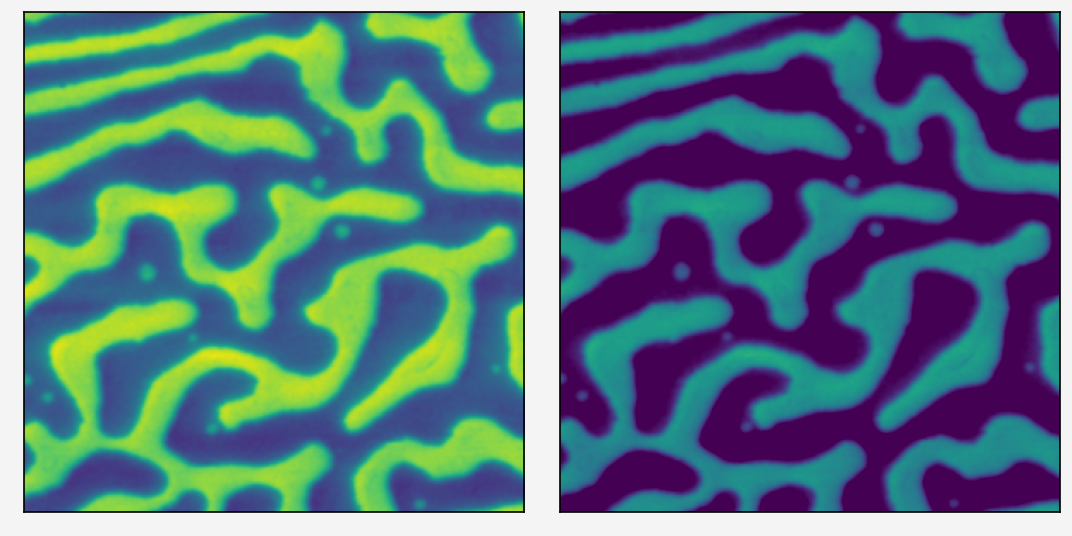

In [4]:
import proplot as pplt

fig = pplt.figure()
ax1 = fig.subplot(121)
ax1.imshow(input_phase, vmin=-np.pi/2, vmax=np.pi/2, cyclic=True, cmap="viridis")
ax1.format(xticks=[], yticks=[])
ax2 = fig.subplot(122)
ax2.imshow(output_phase, vmin=-np.pi/2, vmax=np.pi/2, cyclic=True, cmap="viridis")
ax2.format(xticks=[], yticks=[])

(178, 178)

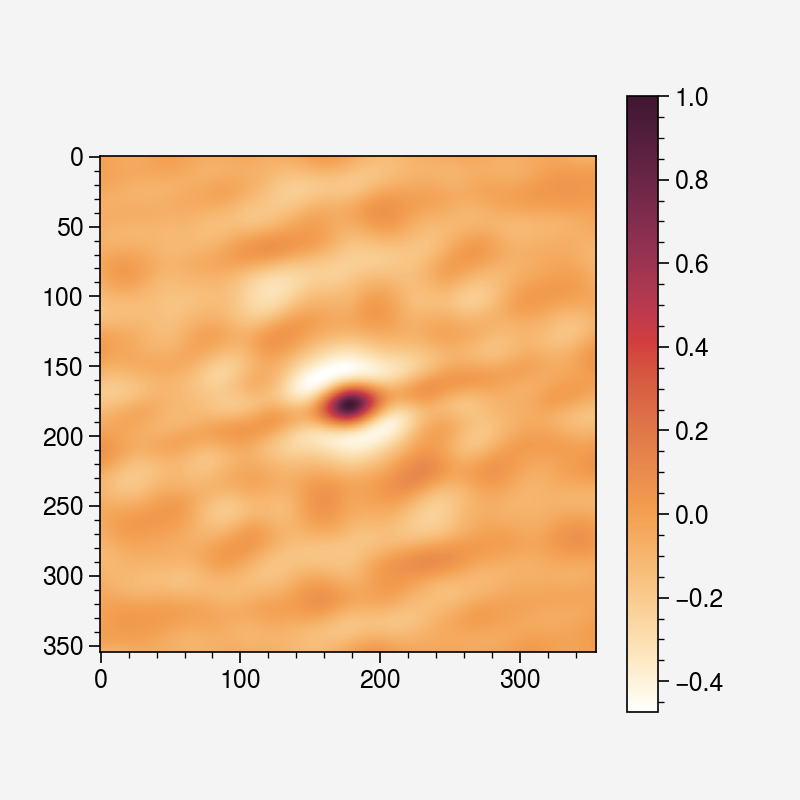

In [5]:
from scipy import signal
cross_correlation = signal.correlate(input_phase, output_phase, mode="same")
cross_correlation /= cross_correlation.max()
plt.imshow(cross_correlation)
plt.colorbar()
ind = cross_correlation.argmax()
peak = np.unravel_index(ind, cross_correlation.shape)
peak
#[signal.find_peaks(cross_correlation[i,:], height=0.9) for i in range(cross_correlation.shape[0])][175:185]
# signal.find_peaks(cross_correlation[:,179])
# peak = (179, 178) # thus the image is shift by 2 pixels in x axis

In [6]:
V1, V2 = peak

# -1 is optional
# input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1), (244 - V2):(244 + 356 - V2)]
input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1 -1), (244 - V2):(244 + 356 - V2 -1)]

np.sum(np.abs(output_phase - input_phase)**2)/np.sum(np.abs(input_phase)**2)

1.715364673582192

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.0036357794547079605
        x: [ 4.949e-05 -5.566e-05 -1.035e+00]
      nit: 7
      jac: [ 9.863e-06  1.183e-05  5.201e-08]
 hess_inv: [[ 2.474e-04 -3.471e-08 -4.379e-02]
            [-3.471e-08  2.473e-04 -4.379e-02]
            [-4.379e-02 -4.379e-02  1.810e+01]]
     nfev: 156
     njev: 36


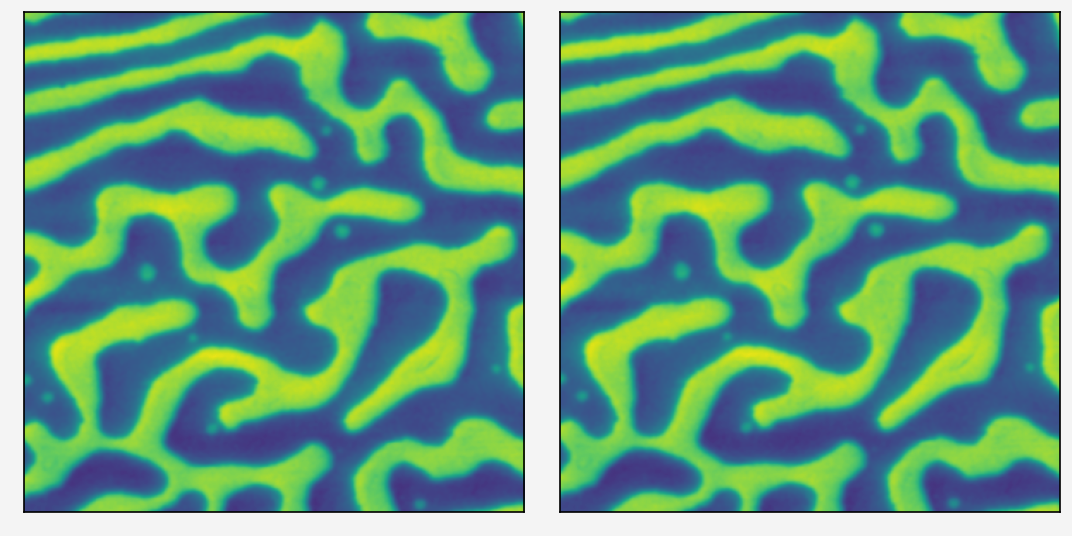

In [7]:
corrected, res = phase_linear_fit(original=input_phase, shifted=output_phase)
print(res)

import proplot as pplt

fig = pplt.figure()
ax1 = fig.subplot(121)
ax1.imshow(input_phase, vmin=-np.pi/2, vmax=np.pi/2, cyclic=True, cmap="viridis")
ax1.format(xticks=[], yticks=[])
ax2 = fig.subplot(122)
ax2.imshow(corrected, vmin=-np.pi/2, vmax=np.pi/2, cyclic=True, cmap="viridis")
ax2.format(xticks=[], yticks=[])

In [8]:
np.save("corrected_phase", corrected)

padding factor = 2.

In [134]:
import numpy as np
sampling = 0.2 # Angstrom

input_phase_raw = np.load("../object_phase.npy")
output_phase = np.angle(np.load(r"d:\Users\yiran.lu\Nextcloud\113 - SimpleSim\SamplePNGScikit\results\task_SimpleSimScikit_ePIE_padding_2\final_trans_rot.npy"))
# output_phase = np.angle(np.load(r"d:\Users\yiran.lu\Nextcloud\113 - SimpleSim\SamplePNGScikit\results\task_SimpleSimScikit_PtyPy_DM_padding_2_full_support\final_trans_rot_0100.npy"))
# output_phase = np.angle(np.load(r"d:\Users\yiran.lu\Nextcloud\113 - SimpleSim\SamplePNGScikit\results\task_SimpleSimScikit_PtyPy_EPIE_200_padding_2\final_trans_rot_0200.npy"))
output_phase = unwrap_phase(output_phase[::2,::2] - 1.8)

# output_phase is shifted by pi
#                              shift   (shift to (0, 2*np.pi))
# output_phase = (output_phase - 2.58 + np.pi) % (2*np.pi) - np.pi
# output_phase[output_phase > np.pi] -= 2 * np.pi
# output_phase[output_phase <= -np.pi] += 2 * np.pi

V1, V2 = 178, 178
#V1, V2 = peak

input_phase = input_phase_raw[(245 - V1):(245 + 355 - V1), (245 - V2):(245 + 355 - V2)]

print("input_phase: shape ", input_phase.shape)
print("output_phase: shape ", output_phase.shape)

input_phase: shape  (355, 355)
output_phase: shape  (355, 355)


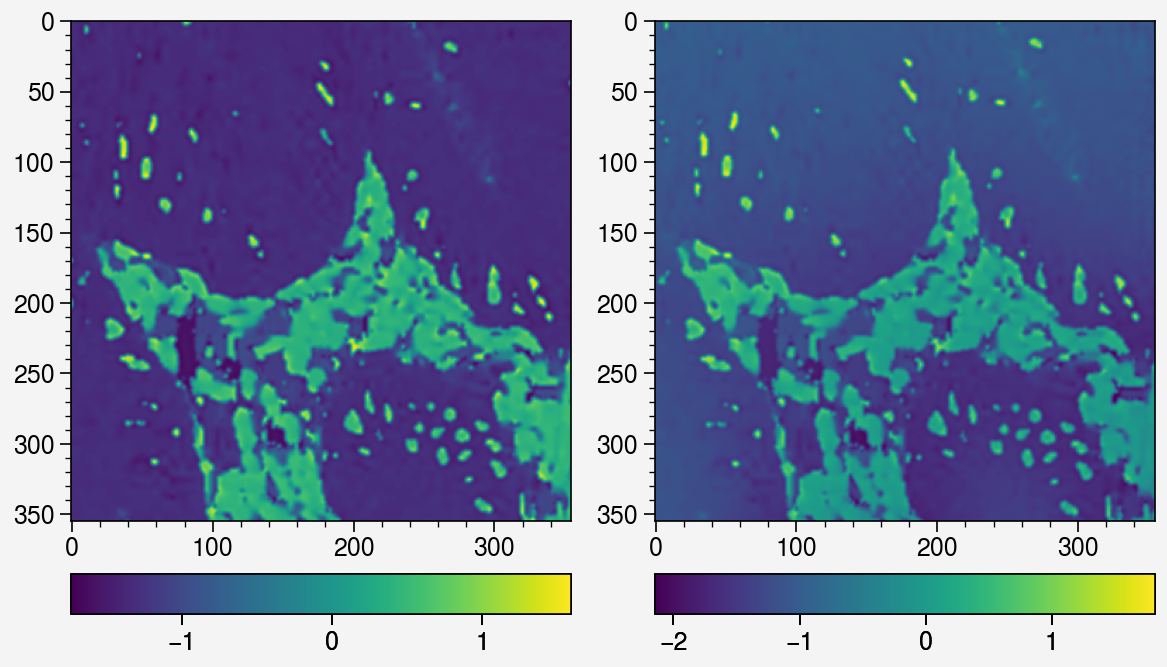

In [135]:
import proplot as pplt

fig = pplt.figure(share=False)
ax1 = fig.subplot(121)
m = ax1.imshow(input_phase, cyclic=True, cmap="viridis")
ax1.colorbar(m, loc="b")
ax2 = fig.subplot(122)
m = ax2.imshow(output_phase, cyclic=True, cmap="viridis")
ax2.colorbar(m, loc="b")

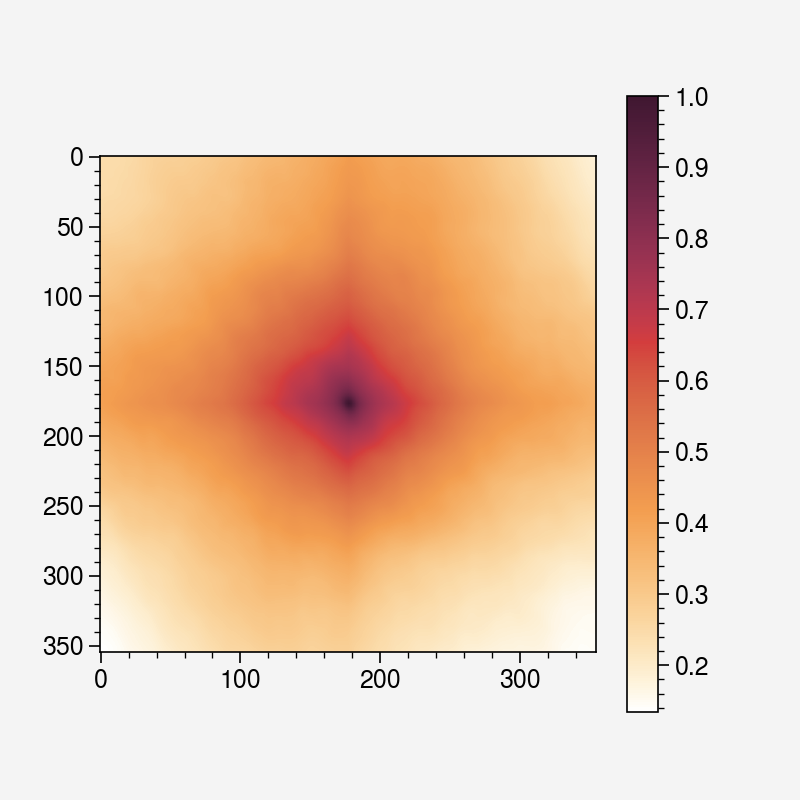

In [139]:
from scipy import signal
cross_correlation = signal.correlate(input_phase, output_phase, mode="same")
cross_correlation /= cross_correlation.max()
plt.imshow(cross_correlation)
plt.colorbar()
[signal.find_peaks(cross_correlation[i,:], height=0.9) for i in range(cross_correlation.shape[0])][170:190]
signal.find_peaks(cross_correlation[:,177])
peak = (177, 177) # thus the image is shift by 2 pixels in x axis

In [140]:
V1, V2 = peak

# -1 is optional
# input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1), (244 - V2):(244 + 356 - V2)]
input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1 -1), (244 - V2):(244 + 356 - V2 -1)]

np.sum(np.abs(np.abs(output_phase - input_phase)))/np.sum(np.abs(output_phase))

0.23940304900660012